# Interpolação Linear por Partes

In [ ]:
import matplotlib.pyplot as plt

def linear_interp(X_coord: list, Y_coord: list):
  '''
  A função recebe duas listas com as coordenadas x e y
  de alguns pontos e retorna uma função definida para
  todos os reais formada pelos segmentos de reta entre
  os pontos fornecidos.
  '''

  '''Ordenando as coordenadas dos pontos'''
  pontos = [(X_coord[i],Y_coord[i]) for i in range(len(X_coord))]
  pontos.sort()

  def f(t, xi=0, xf=1, n=100, title=""):
    '''
    Essa função plota o seu gráfico se t=="graf" e retorna
    o valor esperado da função caso contrário. No caso em
    que t != "graf", apenas o primeiro parametro da função
    é utilizado
    '''

    '''Plotando o gráfico da função'''
    if t=="graf":
      x = [x / n for x in range(int(n*xi) -1, int(n*xf) + 1)]
      y = [f(x) for x in x]

      plt.plot(x, y)

      for p in pontos:
        plt.plot(p[0], p[1], marker='o', color='blue')

      plt.title(title)
      plt.xlabel("Eixo X")
      plt.ylabel("Eixo Y")
      plt.grid(True)

      plt.show()
      return


    '''Busca binária para descobrir em qual intervalo do eixo X o ponto t está.'''
    if t <= pontos[1][0]:
      pos = 0

    elif t >= pontos[-2][0]:
      pos = len(pontos)-2

    else:
      a = 0
      b = len(pontos)-2
      pos = (a+b)//2

      while a != b:
        if t < pontos[pos][0]:
          b = pos-1

        elif t <= pontos[pos+1][0]:
          break

        else:
          a = pos + 1
        pos = (a+b)//2

    '''Retornando o valor da função'''
    return pontos[pos][1] + (t-pontos[pos][0])*(pontos[pos+1][1]-pontos[pos][1])/(pontos[pos+1][0]-pontos[pos][0])

  '''Retornando a função'''
  return f

In [ ]:
#Criando Interpolação
X = [1,2,3,4,5,6]
Y = [3,6,5,1,0,-4]
f = linear_interp(X,Y)

#Criando Interpolação 2
X = [5,3,7,6,10,-1,0]
Y = [3,4,2,8,5,1,5]
f2 = linear_interp(X,Y)

print(f(3.5))
print(f2(4))

3.0
3.5


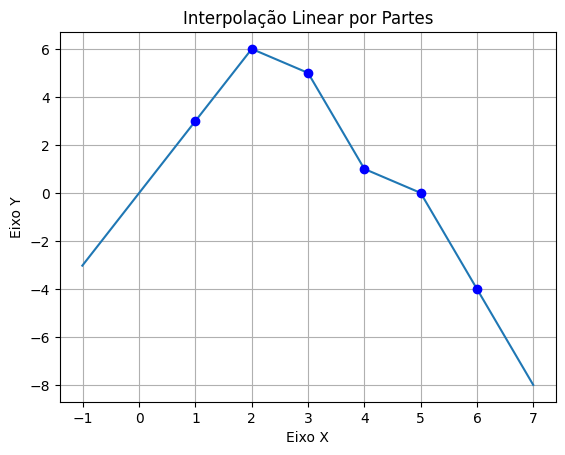

In [ ]:
#Plotando gráfico de f
f("graf", -1, 7, 100, "Interpolação Linear por Partes")

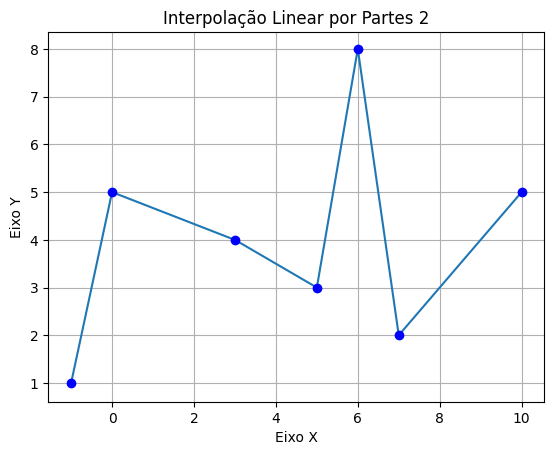

In [ ]:
#Plotando gráfico de f2
f2("graf", -1, 10, 100, "Interpolação Linear por Partes 2")

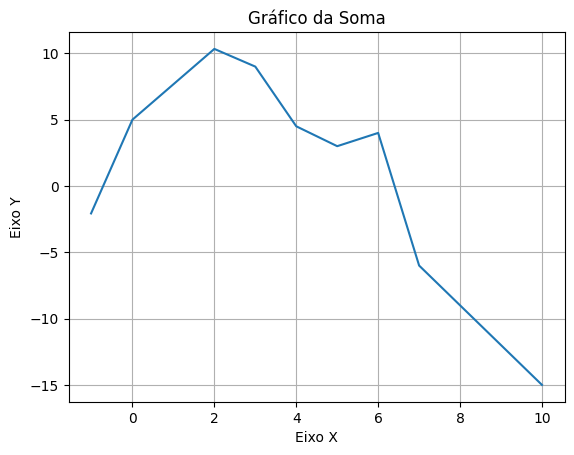

In [ ]:
#Operando com f e f2
def S(t):
  return f(t)+f2(t)

x = [x / 100 for x in range(100*-1//1 -1, 100*10//1 + 1)]
y = [S(t) for t in x]

plt.plot(x, y)

plt.title("Gráfico da Soma")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.grid(True)

plt.show()

O seno de 30° vale(aprox): 0.4970912322408898


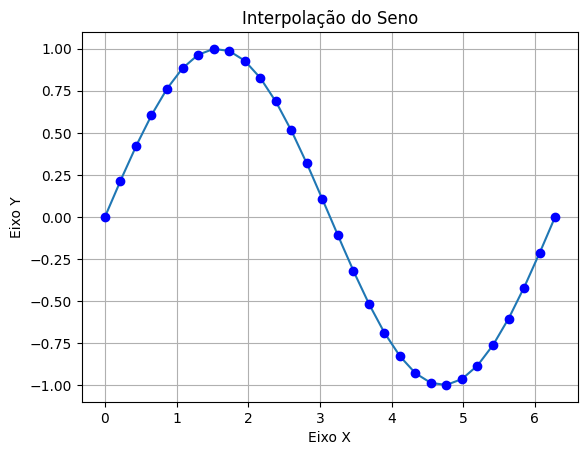

In [ ]:
#Interpolação da função seno
import numpy as np

X = np.linspace(0, 2*np.pi, 30)
Y = np.sin(X)

sen = linear_interp(X,Y)

print("O seno de 30° vale(aprox):", sen(np.pi/6))

sen("graf", 0, 2*np.pi, 100, "Interpolação do Seno")